In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the data**

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [37]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (2000, 28, 28, 1) (2000,)


Train, validation and test split

In [ ]:
val_count = 8000
X_val = X_test[:val_count]
y_val = y_test[:val_count]
X_test = X_test[val_count:]
y_test = y_test[val_count:]

In [ ]:
test_images, test_labels = X_test.copy(), y_test.copy()

In [ ]:
X_train = X_train/ 255.0
X_val = X_val/ 255.0
X_test = X_test/ 255.0

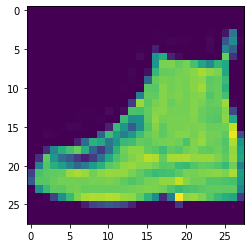

In [9]:
plt.imshow(X_test[23])

There are 10 different classes of images:

0: T-shirt/top;

1: Trouser;

2: Pullover;

3: Dress;

4: Coat;

5: Sandal;

6: Shirt;

7: Sneaker;

8: Bag;

9: Ankle boot.

Image dimmensions are 28x28.


### **Using Convolutions**

In [ ]:
num_epochs=25
batch_size=32

In [ ]:
X_train=X_train.reshape(60000, 28, 28, 1)
X_val=X_val.reshape(val_count, 28, 28, 1)
X_test=X_test.reshape(2000, 28, 28, 1)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3813 - accuracy: 0.8650 - val_loss: 0.3232 - val_accuracy: 0.8820
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9051 - val_loss: 0.2601 - val_accuracy: 0.9020
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2140 - accuracy: 0.9214 - val_loss: 0.2519 - val_accuracy: 0.9116
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1830 - accuracy: 0.9316 - val_loss: 0.2546 - val_accuracy: 0.9074
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1545 - accuracy: 0.9423 - val_loss: 0.2639 - val_accuracy: 0.9101
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1323 - accuracy: 0.9510 - val_loss: 0.2811 - val_accuracy: 0.9054
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1109 - accuracy: 0.9592 - val_loss: 0.2709 - val_accuracy:

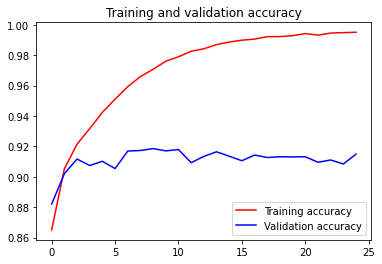

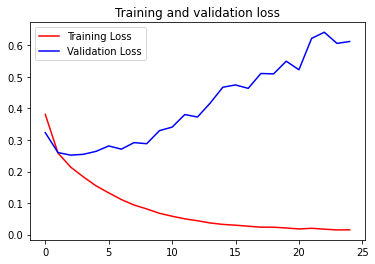

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
    print('Training data:')
    loss, acc = model.evaluate(X_train, y_train, verbose=0)
    print("  Training : loss %.3f - acc %.3f" % (loss, acc))
    print('Cross-validation data:')
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print("  Cross-val: loss %.3f - acc %.3f" % (loss, acc))
    print('Test data:')
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))

Training data:
  Training : loss 0.008 - acc 0.998
Cross-validation data:
  Cross-val: loss 0.613 - acc 0.915
Test data:
63/63 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.9195
  Testing  : loss 0.551 - acc 0.919


**There is considerable difference between the training and validation accuracy. Hence model is over-fitting the training data.**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
a = np.random.randint(0, len(X_test), 1)

In [19]:
y_pred[a]

array([[9.9983120e-01, 2.9984424e-17, 6.3229748e-11, 1.3033248e-11,
        2.5269090e-12, 1.3691843e-16, 1.6877838e-04, 9.0929417e-17,
        1.5294645e-16, 2.0731741e-12]], dtype=float32)

In [20]:
y_test[a]

array([0], dtype=uint8)

### **Attempting Dropout to improve validation and test accuracy**

In [21]:
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)      

In [26]:
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4590 - accuracy: 0.8390 - val_loss: 0.3711 - val_accuracy: 0.8674
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3169 - accuracy: 0.8868 - val_loss: 0.3032 - val_accuracy: 0.8930
Epoch 3/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2774 - accuracy: 0.9010 - val_loss: 0.2539 - val_accuracy: 0.9124
Epoch 4/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2513 - accuracy: 0.9111 - val_loss: 0.2928 - val_accuracy: 0.8941
Epoch 5/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2273 - accuracy: 0.9191 - val_loss: 0.2476 - val_accuracy: 0.9162
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2082 - accuracy: 0.9252 - val_loss: 0.2301 - val_accuracy: 0.9185
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1943 - accuracy: 0.9305 - val_loss: 0.2637 - val_ac

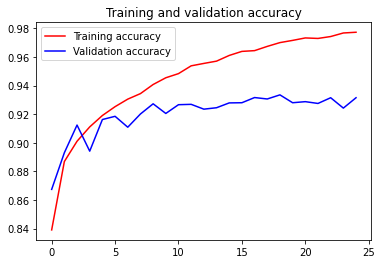

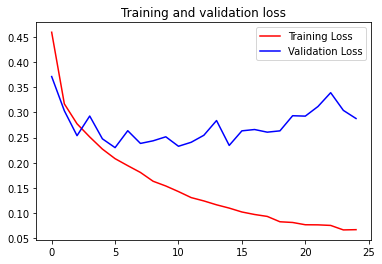

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
    print('Training data:')
    loss, acc = model.evaluate(X_train, y_train, verbose=0)
    print("  Training : loss %.3f - acc %.3f" % (loss, acc))
    print('Cross-validation data:')
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print("  Cross-val: loss %.3f - acc %.3f" % (loss, acc))
    print('Test data:')
    loss, acc = model.evaluate(X_test, y_test, verbose=1)
    print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))

Training data:
  Training : loss 0.026 - acc 0.992
Cross-validation data:
  Cross-val: loss 0.288 - acc 0.932
Test data:
63/63 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.9410
  Testing  : loss 0.238 - acc 0.941


#### So introducing dropout has resulted in better validation accuracy
Model | Training Accuracy | Validation Accuracy | Test accuracy 
---|---|:---|:---:
Base | 0.998 | 0.915 | 0.919
With Droput | 0.992 | 0.932 | 0.941

### **Analysing the influence of learning rate on results**

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import itertools
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras import backend as K
np.random.seed(100)
# Disable warnings
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:

def model_2(learning_rate):
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.summary()

    # Compile model
    adam = keras.optimizers.adam(lr=learning_rate, decay=1e-6)
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [ ]:
def fit_and_evaluate_model(model, learning_rate, batch_size, num_epochs):
    # Fit model
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    
    # Evaluate model
    score = model.evaluate(X_test, y_test, verbose=0)
    #print('Test Loss:', score[0])
    print('Test Accuracy:', score[1])
    
    # Plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("LR:{}, BS:{}".format(learning_rate, batch_size), pad=-20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')


Learning_rate: 0.001, Batch_size: 32
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_33 (Conv

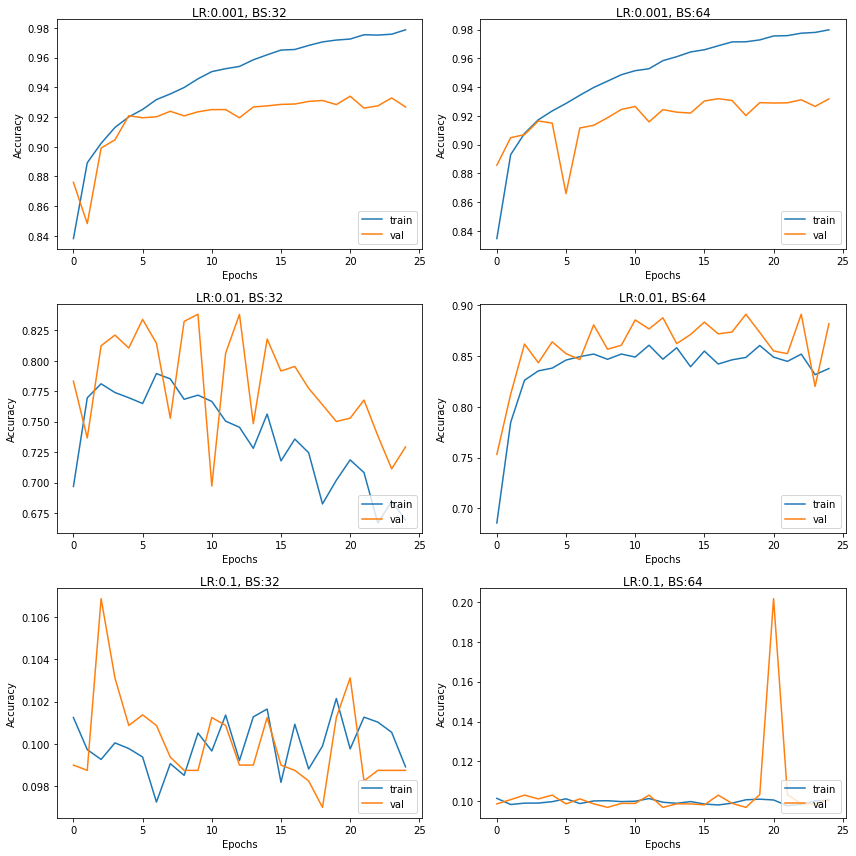

In [65]:
import itertools
learning_rate = [0.001, 0.01, 0.1]
batch_size = [32, 64]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 12))
for params in grid:
  print("\nLearning_rate: {}, Batch_size: {}".format(params[0], params[1]))
  plt.subplot(3, 2, grid.index(params) + 1)
  model2 = model_2(params[0])
  fit_and_evaluate_model(model2, params[0], params[1], 25)
plt.tight_layout()
plt.show()

#### So, learning rate of 0.001 is most appropriate. Batch size has no significant impact